
# Seattle Airbnb data 


- Business Understanding
We are given Airbnb Seattle data and we need to analyse the data and share results with stakeholders on below parameters.
1) Busiest times of the year to visit Seattle?

In [1]:
#Data Understanding
#Analysing the data sources

# Importing Libraries

# Image libraries
from IPython.display import Image
from IPython.core.display import HTML 

# Import linear algebra and data manipulation
import numpy as np
import pandas as pd
import scipy as sp

# Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

In [2]:
import pandas as pd
# Reading Datasets
listings_df = pd.read_csv(r'Z:\Team\Dinesh\Kaggle\listings.csv')
listings_df.shape # (3818, 92)
listings_df.head(2)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [4]:
# delete columns with url
df = listings_df.loc[:, ~listings_df.columns.str.endswith('url')]
df.columns, len(df.columns)

(Index(['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
        'description', 'experiences_offered', 'neighborhood_overview', 'notes',
        'transit', 'host_id', 'host_name', 'host_since', 'host_location',
        'host_about', 'host_response_time', 'host_response_rate',
        'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
        'price', 'weekly_price', 'monthly_price', 'security_deposit',
        'cleaning_fee', 'guests_included', 'extra_p

In [5]:
# Listings 
listings_number = len(listings_df['id'].unique())
listings_number

3818

In [7]:
# HOSTS
hosts_number = len(listings_df['host_id'].unique())
hosts_number

2751

In [8]:
#Missing values in numberic variables
num_vars = listings_df.isnull().mean() 
num_vars

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 92, dtype: float64

In [9]:
# Columns with no missing values
n_missing_val = np.sum(np.sum(df.isnull())==0)
n_missing_val

44

In [10]:
# Columns with all missing values
df.columns[df.isnull().all()]

Index(['license'], dtype='object')

In [11]:
# Dropping with all missing values
df = df.drop(['license'], axis=1)
df.shape

(3818, 83)

In [12]:
# Columns with half missing values
missing_val_5 =df.columns[np.sum(df.isnull())/df.shape[0] >= .5]
missing_val_5

Index(['square_feet', 'monthly_price', 'security_deposit'], dtype='object')

In [13]:
def missing_values(data):
    """
    Filter out columns which have missing values
    
    """
    miss_df = pd.DataFrame(data[data > 0].sort_values(ascending=False), columns=['Value'])
    return miss_df

In [14]:
# Missing values
data_missing_df = df.isnull().mean()
miss_val=missing_values(data_missing_df)
miss_val.shape

(39, 1)

We can see that 'square_feet', 'monthly_price', 'security_deposit', 'weekly_price' and 'notes'  have more than 40% of missing values.

# Reading calendar data

In [15]:
calendar_df = pd.read_csv(r'Z:\Team\Dinesh\Kaggle\calendar.csv')
calendar_df.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [16]:
calendar_df.shape


(1393570, 4)

In [17]:
#Missing Values in Calendar dataset
miss_calendar_df = calendar_df.isnull().mean()
missing_values(miss_calendar_df)

,Value
price,0.32939


# Reviews Dataset

In [18]:
reviews_df = pd.read_csv(r'Z:\Team\Dinesh\Kaggle\reviews.csv')
reviews_df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


# Busiest time to visit Seattle

In [19]:
calendar_df['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [20]:
# Convert price to number and drop the price_new column
calendar_df.rename(columns={'price':'price_new'}, inplace=True)
calendar_df['price'] = calendar_df['price_new'].astype(str)
calendar_df['price'] = calendar_df['price'].str.replace("$", "").str.replace(",", "").str.replace(" ", "").astype("float")
calendar_df.drop(columns=['price_new'], inplace=True)

C:\Users\kumadcj\AppData\Local\Temp/ipykernel_7112/1280972128.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_df['price'] = calendar_df['price'].str.replace("$", "").str.replace(",", "").str.replace(" ", "").astype("float")


In [21]:
print(f"""
The average price of a listing is S{round(calendar_df['price'].mean(),2)}
The minimum price of a listing is ${round(calendar_df['price'].min(),2)}.
The maximum price of a listing is ${round(calendar_df['price'].max(),2)}.
The average price of a listing is ${round(calendar_df['price'].mean(),2)}.
Only 10% of the listings's prices are equal or under ${round(calendar_df['price'].quantile(0.10),2)}.
80% of the listings's prices are equal or under ${round(calendar_df['price'].quantile(0.80),2)}.
95% of the listings's prices are equal or under ${round(calendar_df['price'].quantile(0.95),2)}.
""")


The average price of a listing is S137.94
The minimum price of a listing is $10.0.
The maximum price of a listing is $1650.0.
The average price of a listing is $137.94.
Only 10% of the listings's prices are equal or under $55.0.
80% of the listings's prices are equal or under $181.0.
95% of the listings's prices are equal or under $333.0.



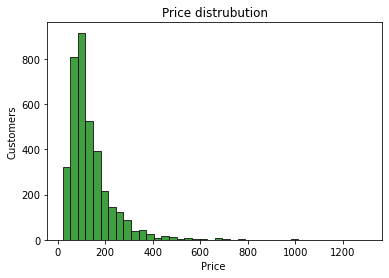

In [22]:
# Get the average price for each listing
mean_price_for_listing = calendar_df.groupby('listing_id').mean()['price']

hist = sns.histplot(data=mean_price_for_listing, 
            color="g", bins=40)
# Lables and titles
hist.axes.set_title("Price distrubution") 
hist.set_xlabel("Price ")
hist.set_ylabel("Customers")

plt.show()

In [23]:
calendar_df.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN


In [24]:
calendar_df['available'].value_counts()


t    934542
f    459028
Name: available, dtype: int64

In [25]:
# Changing available to boolean 
mapping_available ={'t': 1, 'f': 0}
calendar_df['available'] = calendar_df['available'].map(mapping_available)

In [26]:
# Grouping by date
x= calendar_df.groupby(['date']).count()
x.head(1)

,listing_id,available,price
date,,,
2016-01-04,3818,3818,1735


In [27]:
def get_month_from_date(x):
    ''' Get month from date represented as a string 
    
    Inputs: row of a pd.DataFrame
    
    Outputs: int value of the month of a date string
    '''
    return int(x['date'].split('-')[1])

def get_year_from_date(y):
    ''' Get year from date represented as a string 
    
    Inputs: row of a pd.DataFrame
    
    Outputs: int value of the year of a date string
    '''
    return int(y['date'].split('-')[0])

In [28]:
# Get year and month columns
calendar_df['month'] = calendar_df.apply(lambda x : get_month_from_date(x), axis=1)
calendar_df['year']  = calendar_df.apply(lambda y : get_year_from_date(y), axis=1)
calendar_df.head(2)

,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,85.0,1,2016
1,241032,2016-01-05,1,85.0,1,2016


In [30]:
# Excluding 2017 year
calendar_df_2=calendar_df[calendar_df['year'] !=2017]


In [31]:

calendar_df_2.groupby('year').count()

,listing_id,date,available,price,month
year,,,,,
2016,1385934,1385934,1385934,928844,1385934


In [32]:
# Finding occupancy
ocp = calendar_df_2[['month', 'available']].groupby('month').mean()
ocp['occupancy'] = 1 - ocp['available']
ocp

,available,occupancy
month,,
1,0.554133,0.445867
2,0.662208,0.337792
3,0.709187,0.290813
4,0.663847,0.336153
5,0.675670,0.324330
6,0.674384,0.325616
7,0.627097,0.372903
8,0.645051,0.354949
9,0.674402,0.325598


- We can see from this data that there is high occupancy in Jan2016, followed by July and Auguest and least busiest month is seen as December 

 Question 2 : What factors guests care about most in choosing accomodations?

In [33]:
reviews_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [40]:
reviews = reviews_df.dropna()

In [41]:
import PIL.Image as image
from wordcloud import WordCloud, STOPWORDS
from os import path
comments = ''.join(list(reviews['comments'].values))
comments = comments.replace('\r', '')
comments = comments.replace('\n', '')
comments = comments.replace('Seattle', '')
comments[:5000]

'Cute and cozy place. Perfect location to everything! Kelly has a great room in a very central location. Beautiful building , architecture and a style that we really like. We felt guite at home here and wish we had spent more time.Went for a walk and found  Center with a major food festival in progress. What a treat.Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!Didn\'t really get to meet Kelly until I was on my out, but she was always readily available by phone. I believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a FridayClose to  Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you\'ll ever find).

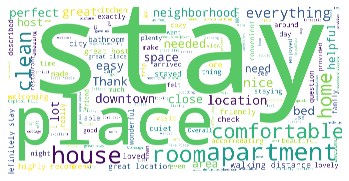

In [43]:
wordcloud =  WordCloud(background_color='white',  max_words=2000, stopwords=STOPWORDS, max_font_size=150, scale=32, random_state=42)
wordcloud.generate_from_text(comments)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Conclusion:
We can find that key words which frequently appear in reviews are "stay", "place",  "house","apartment", "comfortable", "clean", "room", which means that location, the property of listings, comfort, Cleanliness are important factors for guests in choosing accomodations

Question 3: When will it be cheaper to book an accomodataion in Seattle?

In [44]:
calendar_df.head(2)

,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,85.0,1,2016
1,241032,2016-01-05,1,85.0,1,2016


In [45]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df.head(1)

,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,85.0,1,2016


In [49]:
date_price = pd.DataFrame(calendar_df.groupby('date')['price'].sum(), )
date_price['avg'] = calendar_df.groupby('date')['price'].mean()
date_price.columns = ['total', 'avg']
date_price.head(2)

,total,avg
date,,
2016-01-04,211819.0,122.085879
2016-01-05,225312.0,120.681307


- Data Visualization

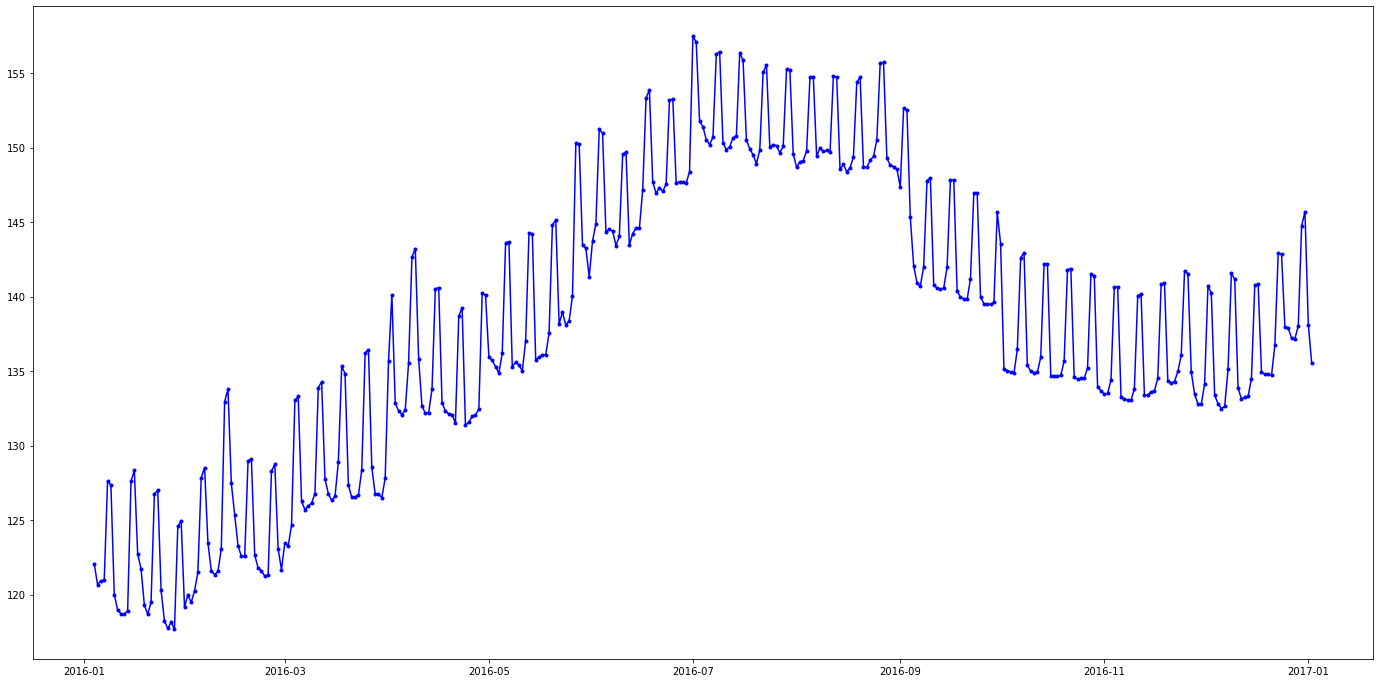

In [50]:
plt.figure(figsize=(24, 12))
plt.plot(date_price.index, date_price['avg'], color='b', linestyle='-', marker='.')

- In general, we see highest price between July and September

In [52]:
#Pulling day from date
calendar_df['day'] = calendar_df['date'].dt.day
calendar_df.head(2)

,listing_id,date,available,price,month,year,day
0,241032,2016-01-04,1,85.0,1,2016,4
1,241032,2016-01-05,1,85.0,1,2016,5


In [54]:
calendar_df['day_of_week'] = calendar_df['date'].map(lambda x: x.weekday()+1)
calendar_df.head(5)

,listing_id,date,available,price,month,year,day,day_of_week
0,241032,2016-01-04,1,85.0,1,2016,4,1
1,241032,2016-01-05,1,85.0,1,2016,5,2
2,241032,2016-01-06,0,NaN,1,2016,6,3
3,241032,2016-01-07,0,NaN,1,2016,7,4
4,241032,2016-01-08,0,NaN,1,2016,8,5


<AxesSubplot:xlabel='month'>

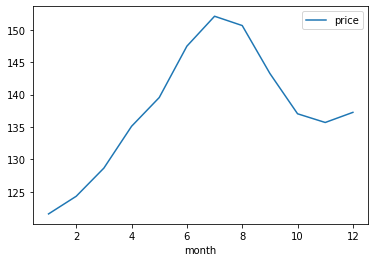

In [59]:
sns.lineplot(data=pd.pivot_table(data=calendar_df[calendar_df['year'] == 2016],index='month',values='price',aggfunc='mean'))

- The average price of accomodation in Seattle is lowest in January, and is highest in July